<a href="https://colab.research.google.com/github/duyqu-chan/Image-Preprocessing/blob/master/Foveation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Foveation 

In this image processing technique image resolution varies across the image according to the fixation point. Then a *mask* is defined by choosing the center pixel as fixation point. Within a predefined radius, zero pixels are for high resolution points and the rest are reserved for those pixels we want to blur. To make things simple, a circle of dark pixels that define the high resolution pixels are created. Since the pixels outside the mask will be blurred according to the their distance from the mask, L2 distances are calculated. Then those distances are further scaled with a given factor. The resulting value will define the foveation strength. According to that value pixels are blurred.
Reference: Work of [rayryeng](https://stackoverflow.com/questions/28910285/image-foveation-in-python) is reproduced.

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def foveate(img, r = 3, scale_factor = 10):
  # A function to foveate image array and return as an array
  # r: mask radius. The images inside this circle will not be foveated at all
  # scale_factor: a factor to scale foveation strength
  # Define mask
  height = img.shape[1]
  width = img.shape[0]
  mask = 255*np.ones((width,height), dtype='uint8')

  # Draw circle at the center with radius r and fill this in with 0
  cv2.circle(mask, (width//2,height//2), r, 0, -1)

  # Apply distance transform to mask
  out = cv2.distanceTransform(mask,cv2.DIST_L2, 3)
  filtered=img.copy()
  img_float = img.copy().astype('float')
  num_chan = img_float.shape[2]
  
  height = img.shape[0]
  width = img.shape[1]
  for y in range(height):
    for x in range(width):

      # If distance transform is 0, skip
      if out[y,x] == 0.0:
        continue

      # Calculate M = d / S
      mask_val = np.ceil(out[y,x] / scale_factor)

      # If M is too small, set the mask size to the smallest possible value
      if mask_val <= 3:
        mask_val = 3

      # Get beginning and ending x and y coordinates for neighbourhood
      # and ensure they are within bounds
      beginx = x-int(mask_val/2)
      if beginx < 0:
        beginx = 0

      beginy = y-int(mask_val/2)
      if beginy < 0:
        beginy = 0

      endx = x+int(mask_val/2)
      if endx >= width:
        endx = width-1

      endy = y+int(mask_val/2)
      if endy >= height:
        endy = height-1

      # Get the coordinates of where we need to grab pixels
      xvals = np.arange(beginx, endx+1)
      yvals = np.arange(beginy, endy+1)
      (col_neigh,row_neigh) = np.meshgrid(xvals, yvals)
      col_neigh = col_neigh.astype('int')
      row_neigh = row_neigh.astype('int')

      # Get the pixels now
      # For each channel, do the foveation
      for ii in range(num_chan):
        chan = img_float[:,:,ii]
        pix = chan[row_neigh, col_neigh].ravel()

        # Calculate the average and set it to be the output
        filtered[y,x,ii] = int(np.mean(pix))
  
  return filtered

Test with a small radius and a low scale factor of 1.

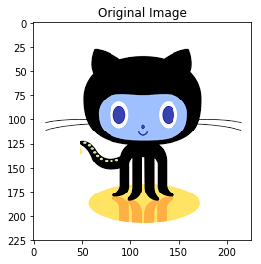

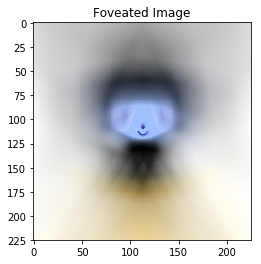

In [0]:
img = cv2.imread('/content/drive/My Drive/github.png')

# y = 1500
# x = 1000
# h = 129
# w=h

# img = img[y:y+h, x:x+w]
plt.figure()
plt.imshow(img)
plt.title("Original Image")
plt.show()

foveated = foveate(img, r = 5, scale_factor=1)

plt.figure()
plt.imshow(foveated)
plt.title("Foveated Image")
plt.show()

Test with default parameters and a 129x129 image window

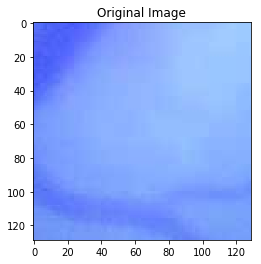

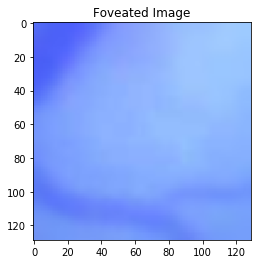

In [0]:
# Test
img = cv2.imread('/content/drive/My Drive/Dataset/Images/IDRiD_81.jpg')

y = 1500
x = 1000
h = 129
w=h

img = img[y:y+h, x:x+w]
plt.figure()
plt.imshow(img)
plt.title("Original Image")
plt.show()

foveated = foveate(img, r = 3, scale_factor=10)

plt.figure()
plt.imshow(foveated)
plt.title("Foveated Image")
plt.show()